In [68]:
import pandas as pd
import os
import time
import requests
import json
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt

import tweepy

import requests
import pandas as pd
import os

import seaborn as sns

df_tweets = pd.read_csv('../Part 2/raw_data')

In [69]:
df_tweets.head(5)

,Unnamed: 0,author_id,text,created_at,lang
0,0,1571666106166743042,@What_If_Truth Lol,2022-09-27 02:11:56+00:00,und
1,1,1518454387026366465,#Paris World Challenge Cup: US shines in city ...,2022-09-27 02:11:56+00:00,en
2,2,342321559,@KBBasement @RexChapman I guarantee his team (...,2022-09-27 02:11:56+00:00,en
3,3,933356815,Check out this listing I just added to my #Pos...,2022-09-27 02:11:56+00:00,en
4,4,1551710898275946506,RT @CuzzyNFT: Civitas Familia is the first NFT...,2022-09-27 02:11:56+00:00,en


In [70]:
df_tweets.shape

(10000, 5)

In [71]:
df_tweets.columns

Index(['Unnamed: 0', 'author_id', 'text', 'created_at', 'lang'], dtype='object')

In [72]:
#Checking for NaN values present in data
df_tweets.isna().sum()

Unnamed: 0    0
author_id     0
text          0
created_at    0
lang          0
dtype: int64

In [73]:
df_clean = pd.DataFrame(df_tweets)
df_clean.to_csv("../Part 2/clean_data.csv")

In [74]:
df_tweets['lang'].value_counts()

en     8642
es      367
und     269
ja      269
in       66
pt       60
ht       42
tl       40
qst      40
ko       31
ar       29
th       24
fr       18
et       14
hi       14
ca       13
qme       8
qam       8
pl        6
de        6
vi        4
zxx       4
zh        4
te        3
it        3
no        2
ta        2
tr        2
nl        1
ml        1
fa        1
eu        1
hu        1
cs        1
is        1
ro        1
lt        1
sv        1
Name: lang, dtype: int64

In [75]:
## convert language code to name
reference_lang = {'en' : 'English', 'ja' : "Japanese", "pt" : "Portuguese", "es" : "Estonian", "hi" : "Hindi", 'in' : 'Indonesian',
                  "und" : "Undetermined", "fr" : "French", "fa" : 'Persian', 'ko' : 'Korean', 'th' : 'Thai', 'ar' : 'Arabic'}
df_tweets['lang'] = df_tweets['lang'].replace(reference_lang)

## find top 5 lanuages count by sort dataframe
lang_table = df_tweets['lang'].value_counts().reset_index().head()
lang_table

,index,lang
0,English,8642
1,Estonian,367
2,Undetermined,269
3,Japanese,269
4,Indonesian,66


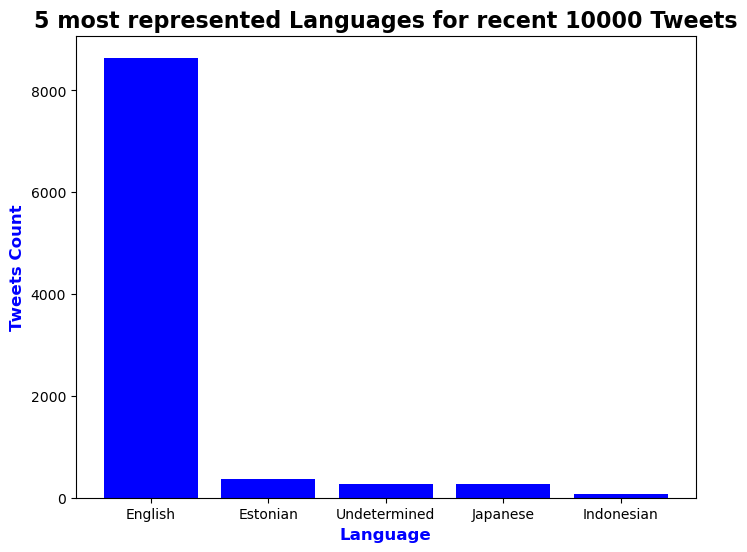

In [76]:
plt.figure(figsize = (8, 6))
plt.bar(lang_table['index'], lang_table['lang'], color = 'blue')
plt.title(f"5 most represented Languages for recent {10000} Tweets", fontweight = 'bold', fontsize = 16)
plt.ylabel("Tweets Count", fontweight = 'bold', fontsize = 12, color='blue')
plt.xlabel("Language", fontweight = 'bold', fontsize = 12, color='blue')
plt.savefig("Language.jpg")
plt.show()

In [77]:
keyword_list = ['Riot','LOL','S12','World Championship','team','prediction win','win rate','KDA','gold','rank','player']

result = {}
for keyword in keyword_list:
    cnt = 0
    for text in df_tweets['text'].values:
        if keyword in text:
            cnt += 1
    result[keyword] = cnt
result

{'Riot': 6,
 'LOL': 297,
 'S12': 1,
 'World Championship': 9,
 'team': 2889,
 'prediction win': 0,
 'win rate': 2,
 'KDA': 15,
 'gold': 283,
 'rank': 141,
 'player': 671}

In [78]:
df_keywords = pd.DataFrame(result.values(), index=result.keys()).reset_index()
df_keywords.columns = ['Keyword', 'Count']
df_keywords = df_keywords.sort_values(by='Count', ascending = False)

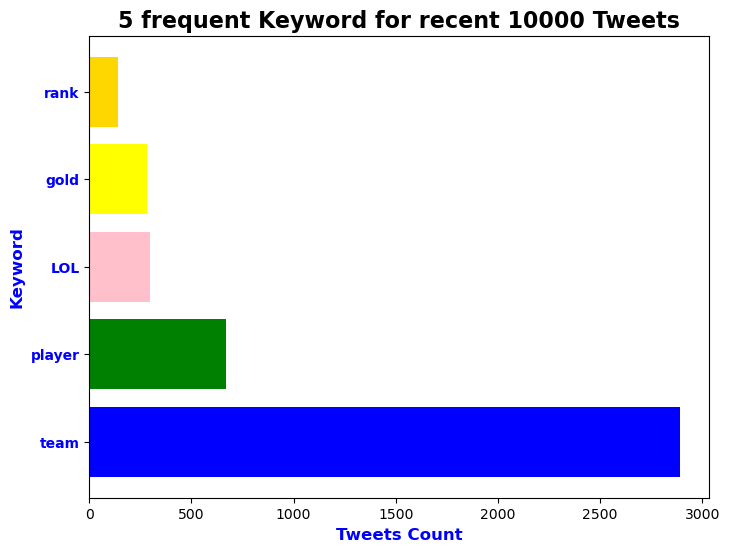

In [79]:
plt.figure(figsize = (8, 6))
df_keywords = df_keywords.head()
plt.barh(df_keywords['Keyword'], df_keywords['Count'],  color = ['blue', 'green', 'pink', 'yellow', 'gold'])
plt.title(f"5 frequent Keyword for recent {10000} Tweets", fontweight = 'bold', fontsize = 16)
plt.ylabel("Keyword", fontweight = 'bold', fontsize = 12, color='blue')
plt.xlabel("Tweets Count", fontweight = 'bold', fontsize = 12, color='blue')
plt.yticks(color='blue', fontweight = 'bold')
plt.savefig("Keyword.jpg")
plt.show()

In [80]:
df_keywords = pd.DataFrame(result.values(), index=result.keys()).reset_index()
df_keywords.columns = ['Keyword', 'Count']
df_keywords = df_keywords.sort_values(by='Count', ascending = False)
df_keywords

,Keyword,Count
4,team,2889
10,player,671
1,LOL,297
8,gold,283
9,rank,141
7,KDA,15
3,World Championship,9
0,Riot,6
6,win rate,2
2,S12,1


In [81]:
team_list = ['EDG', 'DK', 'RNG', 'T1', 'TES', 'GEN']
results_nation = {}
for team in team_list:
    cnt = 0
    for idx in range(len(df_tweets)):
        if team.lower() in df_tweets['text'][idx].lower():
            cnt += 1
    results_nation[team] = cnt
results_nation

{'EDG': 22, 'DK': 106, 'RNG': 2, 'T1': 54, 'TES': 373, 'GEN': 267}

In [82]:
df_team = pd.DataFrame(results_nation.values(), index=results_nation.keys()).reset_index()
df_team.columns = ['Team', 'Support']
df_team = df_team.sort_values(by='Support', ascending = False)

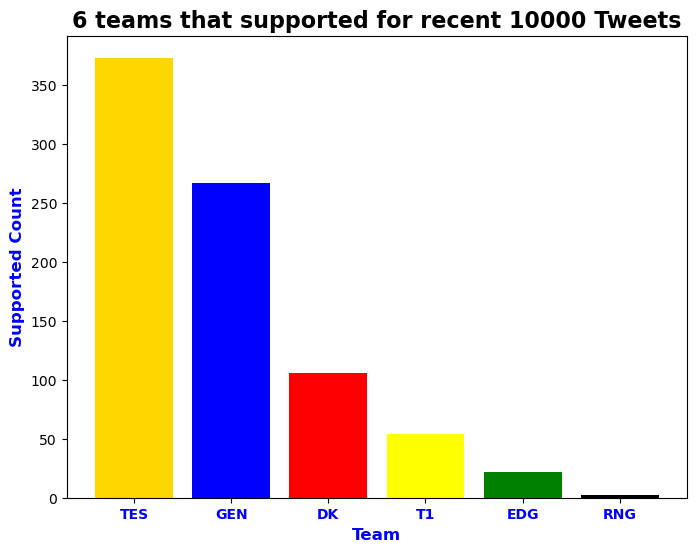

In [83]:
plt.figure(figsize = (8, 6))
plt.bar(df_team['Team'], df_team['Support'], color = ['gold', 'blue', 'red', 'yellow', 'green', 'black'])
plt.title(f"6 teams that supported for recent {10000} Tweets", fontweight = 'bold', fontsize = 16)
plt.ylabel("Supported Count", fontweight = 'bold', fontsize = 12, color='blue')
plt.xlabel("Team", fontweight = 'bold', fontsize = 12, color='blue')
plt.xticks(color='blue', fontweight='bold')
plt.savefig("Team.jpg")
plt.show()

In [84]:
df_team

,Team,Support
4,TES,373
5,GEN,267
1,DK,106
3,T1,54
0,EDG,22
2,RNG,2


In [85]:
data_game = pd.read_csv("../games.csv")

In [86]:
winner = data_game[["winner"]]
winner = winner.T
winner.shape

(1, 51490)

In [87]:
data_game

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [88]:
data_game.isnull().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

In [89]:
data_game.drop(["gameId"],axis = 1,inplace = True)
data_game.drop(["creationTime"],axis = 1,inplace = True)

In [90]:
champs = data_game[["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5"]]


In [91]:
data_game.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","gameDuration","seasonId"],axis = 1,inplace = True)


In [92]:
data_game["t1_total_kills"] = data_game["t1_champ1_sum1"] + data_game["t1_champ1_sum2"] + data_game["t1_champ2_sum1"] + data_game["t1_champ2_sum2"] + data_game["t1_champ3_sum1"] + data_game["t1_champ3_sum2"] + data_game["t1_champ4_sum1"] + data_game["t1_champ4_sum2"] + data_game["t1_champ5_sum1"] + data_game["t1_champ5_sum2"] 
data_game["t2_total_kills"] = data_game["t2_champ1_sum1"] + data_game["t2_champ1_sum2"] + data_game["t2_champ2_sum1"] + data_game["t2_champ2_sum2"] + data_game["t2_champ3_sum1"] + data_game["t2_champ3_sum2"] + data_game["t2_champ4_sum1"] + data_game["t2_champ4_sum2"] + data_game["t2_champ5_sum1"] + data_game["t2_champ5_sum2"] 
                                                     

In [93]:
data_game[["t1_total_kills", "t2_total_kills", "winner"]]

,t1_total_kills,t2_total_kills,winner
0,69,61,1
1,67,78,1
2,65,71,1
3,65,69,1
4,60,65,1
...,...,...,...
51485,78,65,2
51486,78,67,2
51487,65,76,2
51488,67,76,2


In [94]:
data_game[["firstInhibitor","winner"]].groupby(["firstInhibitor"],as_index = False).mean().sort_values(by = "winner",ascending = False)

,firstInhibitor,winner
2,2,1.913448
0,0,1.488528
1,1,1.091307


In [95]:
data_game[["firstBaron", "winner"]].groupby(["firstBaron"], as_index=False).mean().sort_values(by="winner", ascending = False)

,firstBaron,winner
2,2,1.802416
0,0,1.464705
1,1,1.188372


In [96]:
data_game[["firstTower", "winner"]].groupby(["firstTower"], as_index = False).mean().sort_values(by = "winner", ascending=False)

,firstTower,winner
2,2,1.708019
0,0,1.482275
1,1,1.291597


In [97]:
data_game[["firstBlood","winner"]].groupby(["firstBlood"],as_index = False).mean().sort_values(by = "winner",ascending = False)

,firstBlood,winner
2,2,1.587181
0,0,1.463063
1,1,1.405200


In [98]:
data_game[["firstDragon","winner"]].groupby(["firstDragon"],as_index = False).mean().sort_values(by = "winner",ascending = False)

,firstDragon,winner
2,2,1.674677
0,0,1.464000
1,1,1.314014


In [99]:
data_game[["firstRiftHerald","winner"]].groupby(["firstRiftHerald"],as_index = False).mean().sort_values(by = "winner",ascending = False)

,firstRiftHerald,winner
2,2,1.694653
0,0,1.491615
1,1,1.305453


In [100]:
data_game[data_game["winner"] == 2]

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,...,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t1_total_kills,t2_total_kills
8,2,2,2,2,0,2,2,12,4,4,...,11,14,4,8,1,0,2,1,56,85
9,2,2,2,2,2,2,0,4,3,11,...,4,12,4,8,3,1,2,0,67,67
10,2,2,2,2,2,2,2,4,21,7,...,4,3,4,10,2,1,1,1,74,67
14,2,2,2,1,1,2,0,4,3,4,...,12,4,7,9,2,0,2,0,69,67
16,2,2,2,2,2,2,0,4,7,3,...,3,4,12,9,3,2,4,0,74,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,2,2,1,2,2,2,0,4,7,7,...,14,4,12,11,5,2,3,0,83,69
51485,2,1,2,2,0,2,0,12,4,4,...,4,11,4,10,2,0,4,0,78,65
51486,2,1,1,2,2,2,2,4,14,4,...,12,14,4,11,7,4,4,1,78,67
51487,2,2,2,2,0,1,0,11,4,7,...,4,14,4,10,2,0,2,0,65,76


In [101]:
constraints = (data_game["firstInhibitor"] == 2) & (data_game["firstBaron"] == 2) & (data_game["firstTower"] == 2) & (data_game["firstRiftHerald"] == 2) & (data_game["firstBlood"] == 2) & (data_game["firstDragon"] == 2)

In [102]:
data_game[constraints & (data_game["winner"] == 2)]

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,...,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t1_total_kills,t2_total_kills
10,2,2,2,2,2,2,2,4,21,7,...,4,3,4,10,2,1,1,1,74,67
52,2,2,2,2,2,2,2,21,4,14,...,4,14,4,7,1,1,2,1,85,70
56,2,2,2,2,2,2,2,12,4,4,...,6,4,12,9,1,1,2,1,69,67
62,2,2,2,2,2,2,2,11,4,4,...,4,7,4,10,3,1,3,1,67,74
83,2,2,2,2,2,2,2,12,4,4,...,7,12,4,8,2,1,3,1,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51207,2,2,2,2,2,2,2,7,4,4,...,12,4,14,10,2,2,3,1,61,67
51266,2,2,2,2,2,2,2,7,4,21,...,7,4,12,11,3,1,4,1,74,76
51326,2,2,2,2,2,2,2,6,4,4,...,3,11,4,10,2,1,1,1,59,59
51346,2,2,2,2,2,2,2,4,7,14,...,4,14,4,11,2,2,4,1,70,67


In [103]:
g = sns.catplot(x = "firstInhibitor",y = "winner", data = data_game,kind = "bar",height = 6)

In [104]:
g = sns.catplot(x = "firstBaron",y = "winner", data = data_game,kind = "bar",height = 6)

In [105]:
g = sns.catplot(x = "firstRiftHerald",y = "winner", data = data_game,kind = "bar",height = 6)

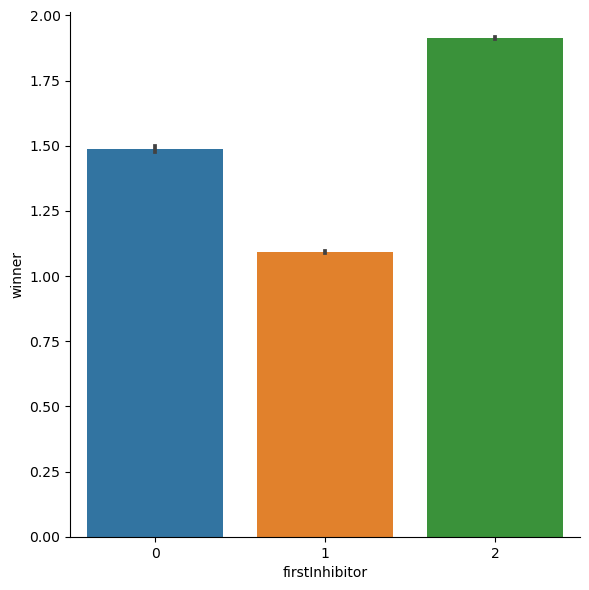

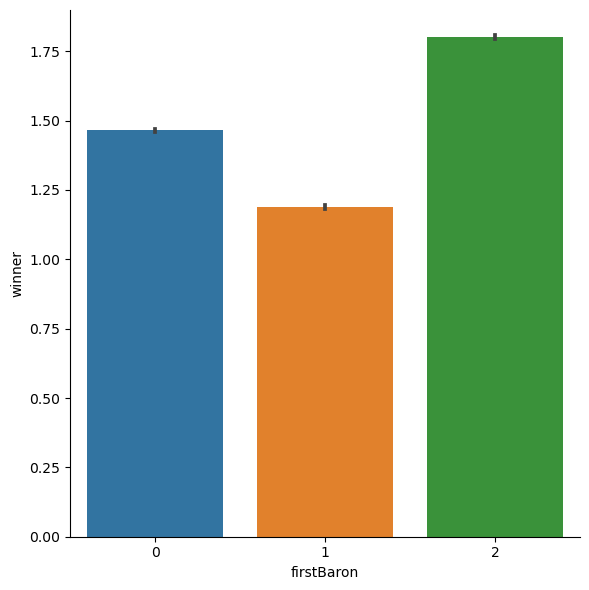

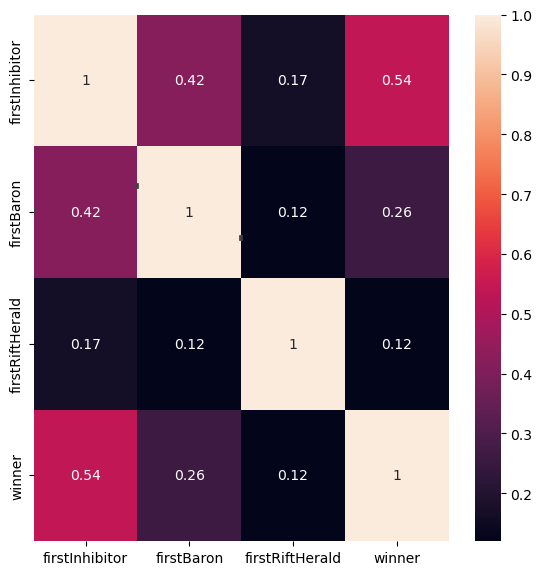

In [106]:
sns.heatmap(data_game[["firstInhibitor","firstBaron","firstRiftHerald","winner"]].corr(),annot = True)
plt.show()

In [107]:
data_game.to_csv("../Part 2/clean_data_game_py.csv")